# Micro Credit Defaulter Project

In [19]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier 
import xgboost as xgb

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
#acquiring the data
micro_cr=pd.read_csv("/content/Data file.csv")

In [29]:
#analysing the data
print(micro_cr.columns)

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


In [30]:
#previewing the top 5 rows of the data
micro_cr.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [31]:
#droping the column 'Unnamed: 0' as it was same as indexing
micro_cr = micro_cr.drop(['Unnamed: 0'], axis=1)

In [32]:
#checking the structure of the dataset
micro_cr.shape

(209593, 36)

In [33]:
#extracting the general information from the dataset
micro_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [34]:
#class distribution of the target value
micro_cr.groupby("label").size()

label
0     26162
1    183431
dtype: int64

In [35]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = micro_cr[micro_cr.label==1]
df_minority = micro_cr[micro_cr.label==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=183431, # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
micro_cr_df = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
micro_cr_df.label.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [36]:
#checking the structure of the dataset
micro_cr_df.shape

(366862, 36)

In [37]:
micro_cr_df["day"] = pd.to_datetime(micro_cr_df.pdate, format="%Y-%m-%d").dt.day

micro_cr_df["month"] = pd.to_datetime(micro_cr_df.pdate, format = "%Y-%m-%d").dt.month

micro_cr_df["year"] = pd.to_datetime(micro_cr_df.pdate, format = "%Y-%m-%d").dt.year

In [38]:
#droping the column 'pdate' as it was expanded seperately
micro_cr_df = micro_cr_df.drop(['pdate'], axis=1)

In [ ]:
micro_cr_df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

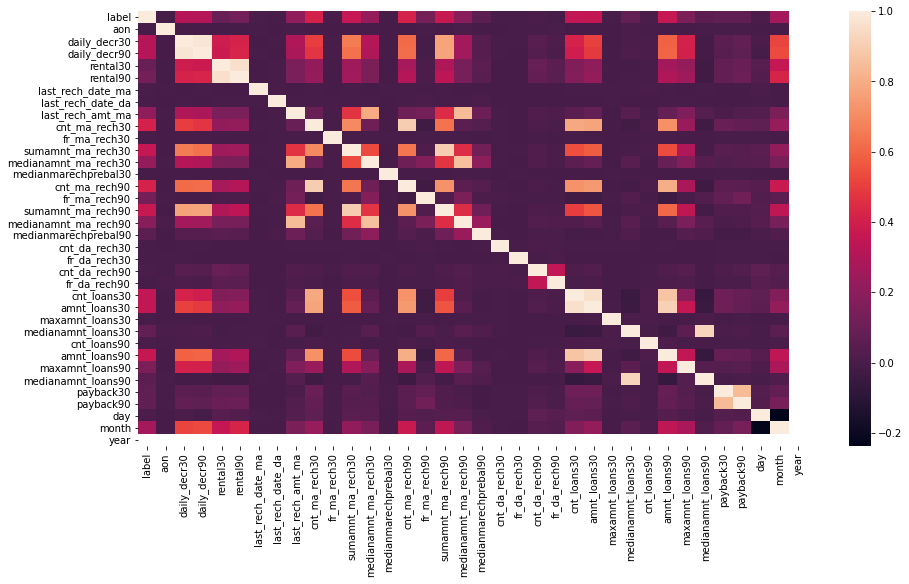

In [ ]:
#checking for the correlation
corr_hmap=micro_cr_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_hmap)

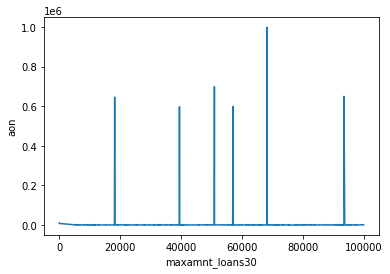

In [ ]:
#vizualizing the 'maximum amount of loan taken by the user in last 30 days' vs 'age on cellular network in days'
sns.lineplot(x='maxamnt_loans30',y='aon',data=micro_cr_df)

In [ ]:
#class distribution of the object class
micro_cr_df.groupby("pcircle").size()

pcircle
UPW    366862
dtype: int64

In [39]:
data_df=micro_cr_df.drop(['msisdn','year','pcircle'],axis=1)
print(data_df.shape)

(366862, 35)


In [ ]:
#statastical report
data_df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.00000,366862.000000
mean,0.500000,8499.628789,3616.610693,4019.955115,2403.588683,2983.933776,3576.181481,3661.732708,1707.527844,2.829557,3602.901010,5361.213628,1476.523261,4148.536467,4.386055,6.496797,8453.473426,1575.970418,74.678241,251.366375,3755.643630,0.039639,0.050011,2.190039,14.063419,270.864904,0.042960,17.180749,17.656465,6.503601,0.037897,2.918681,3.750926,14.33436,6.667019
std,0.500001,77678.013689,7538.280044,8827.253660,4073.433896,5223.072178,52473.497688,53057.595890,2283.393032,3.724733,52363.603997,8634.334449,2000.467076,56292.656021,6.156150,12.319852,14130.269557,2061.187452,418.344405,4072.867783,54194.515923,0.426790,0.957131,2.163196,14.667606,4229.536284,0.193085,221.165520,21.983450,1.780156,0.180369,9.309587,10.824700,8.13105,0.666218
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,0.000000,209.000000,12.400000,12.650000,169.040000,182.700000,1.000000,0.000000,770.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,773.000000,770.000000,0.800000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,8.00000,6.000000
50%,0.500000,471.000000,518.900000,525.280000,876.960000,1026.600000,3.000000,0.000000,777.000000,2.000000,0.000000,2312.000000,773.000000,21.830000,2.000000,1.000000,3470.000000,947.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,14.00000,7.000000
75%,1.000000,916.000000,3835.504000,3950.000000,2866.327500,3511.652500,8.000000,0.000000,1547.000000,4.000000,4.000000,6951.000000,1539.000000,63.500000,6.000000,6.000000,10316.000000,1547.000000,64.000000,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,6.000000,0.000000,3.000000,18.000000,6.000000,0.000000,2.666667,3.454545,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


label                      AxesSubplot(0.125,0.787927;0.110714x0.0920732)
aon                     AxesSubplot(0.257857,0.787927;0.110714x0.0920732)
daily_decr30            AxesSubplot(0.390714,0.787927;0.110714x0.0920732)
daily_decr90            AxesSubplot(0.523571,0.787927;0.110714x0.0920732)
rental30                AxesSubplot(0.656429,0.787927;0.110714x0.0920732)
rental90                AxesSubplot(0.789286,0.787927;0.110714x0.0920732)
last_rech_date_ma          AxesSubplot(0.125,0.677439;0.110714x0.0920732)
last_rech_date_da       AxesSubplot(0.257857,0.677439;0.110714x0.0920732)
last_rech_amt_ma        AxesSubplot(0.390714,0.677439;0.110714x0.0920732)
cnt_ma_rech30           AxesSubplot(0.523571,0.677439;0.110714x0.0920732)
fr_ma_rech30            AxesSubplot(0.656429,0.677439;0.110714x0.0920732)
sumamnt_ma_rech30       AxesSubplot(0.789286,0.677439;0.110714x0.0920732)
medianamnt_ma_rech30       AxesSubplot(0.125,0.566951;0.110714x0.0920732)
medianmarechprebal30    AxesSubplot(0.

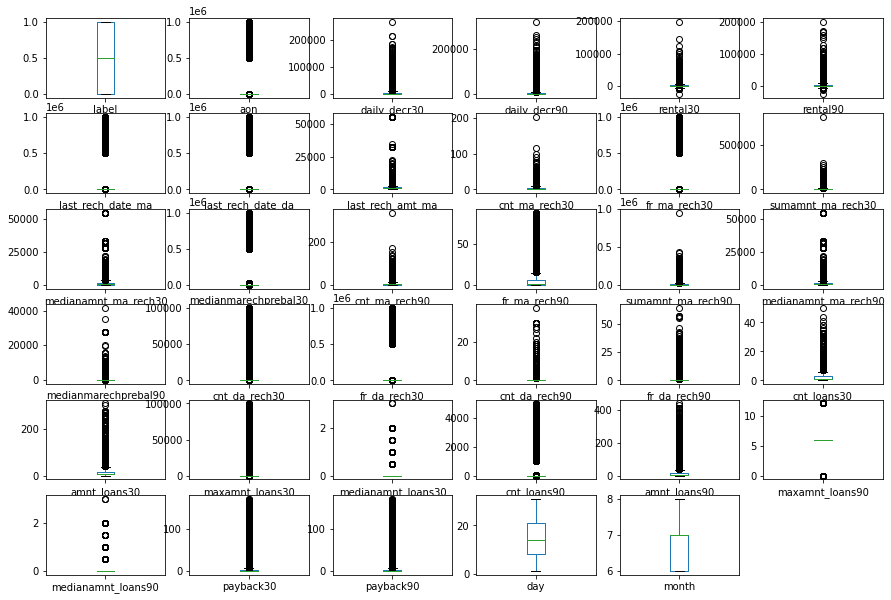

In [ ]:
#checking for the outliers
data_df.plot(kind='box',subplots=True,layout=(7,6),figsize=(15,12))

In [40]:
#removing outliers
from scipy import stats
z = np.abs(stats.zscore(data_df))
print(data_df.shape)
data_df=data_df.iloc[(z<4).all(axis=1)]
print(data_df.shape)

(366862, 35)
(309182, 35)


In [ ]:
#checking the skewness before removing the outliers
data_df.skew()

label                    0.095029
aon                      1.049596
daily_decr30             2.674571
daily_decr90             2.812244
rental30                 2.458353
rental90                 2.511259
last_rech_date_ma        2.948628
last_rech_date_da       11.607682
last_rech_amt_ma         2.323436
cnt_ma_rech30            1.687137
fr_ma_rech30             2.317207
sumamnt_ma_rech30        2.144876
medianamnt_ma_rech30     2.407876
medianmarechprebal30    10.877866
cnt_ma_rech90            1.896385
fr_ma_rech90             2.336547
sumamnt_ma_rech90        2.262699
medianamnt_ma_rech90     2.382048
medianmarechprebal90     5.308149
cnt_da_rech30           46.268002
fr_da_rech30             0.000000
cnt_da_rech90            7.697507
fr_da_rech90             0.000000
cnt_loans30              2.057752
amnt_loans30             2.057728
maxamnt_loans30         45.326848
medianamnt_loans30       6.164720
cnt_loans90              2.347348
amnt_loans90             2.334810
maxamnt_loans9

In [ ]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title("Before "+ str(t).split('(')[0])
    
    plt.subplot(122)
    p1=t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("After "+ str(t).split('(')[0])

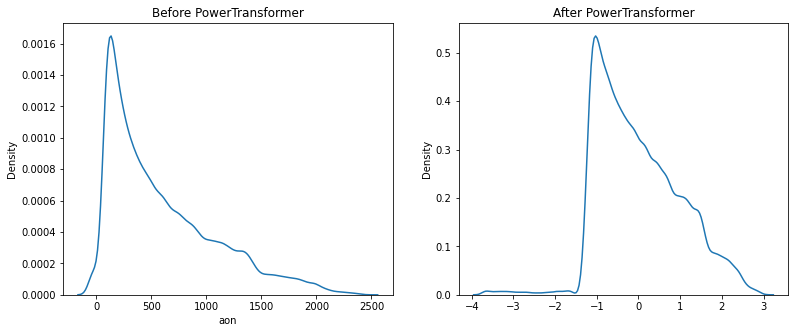

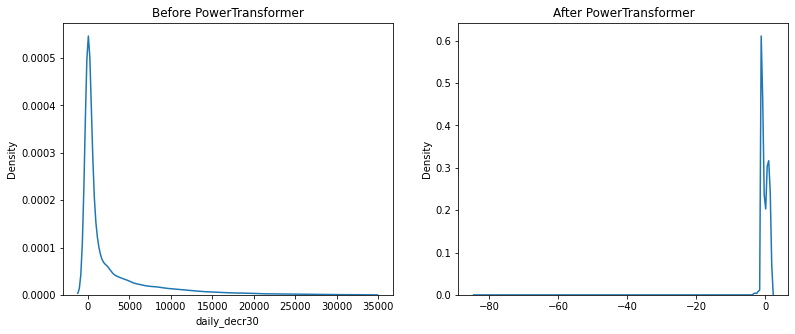

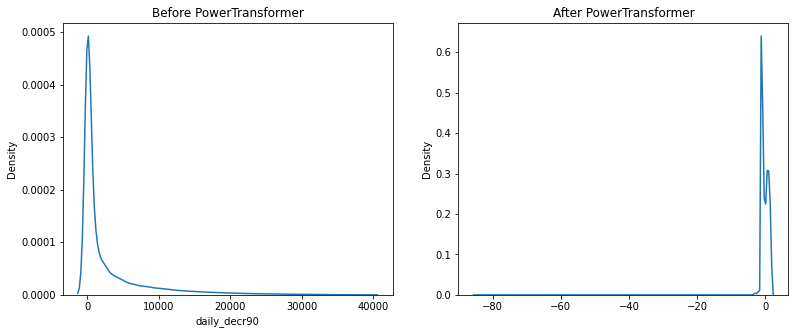

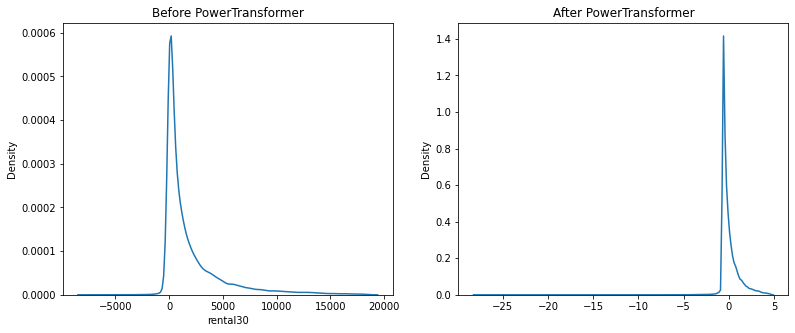

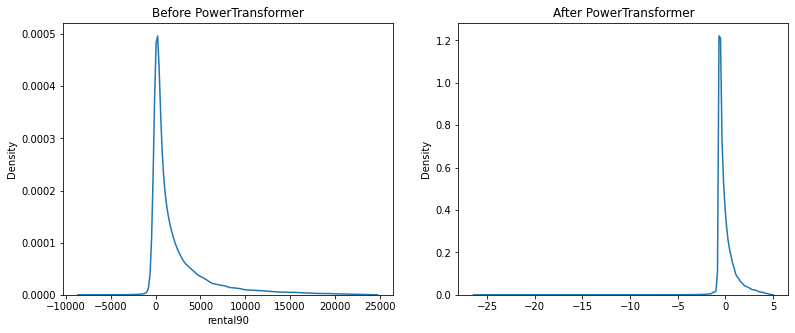

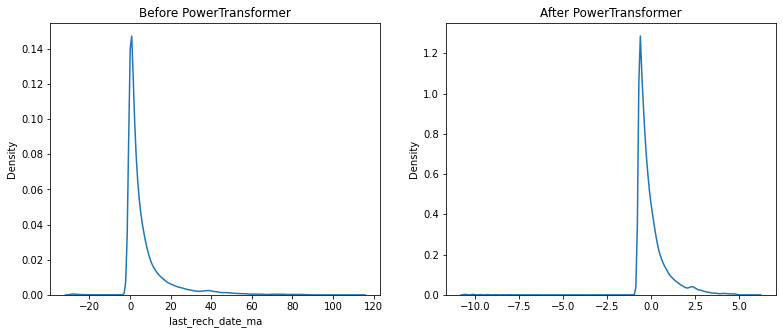

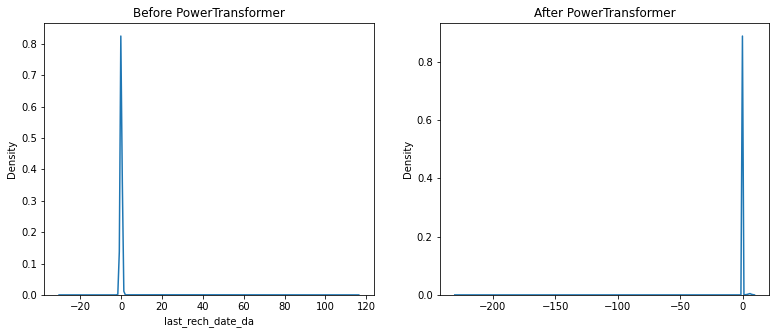

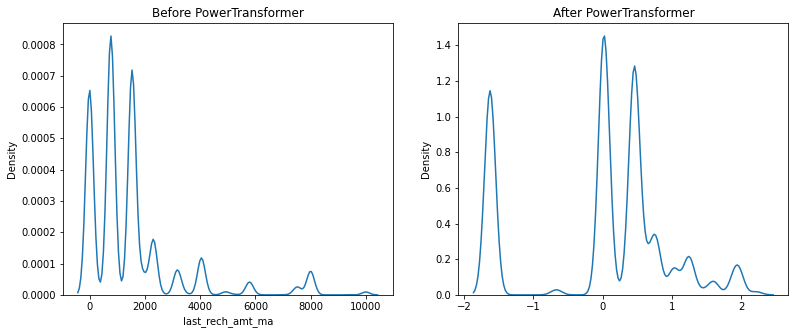

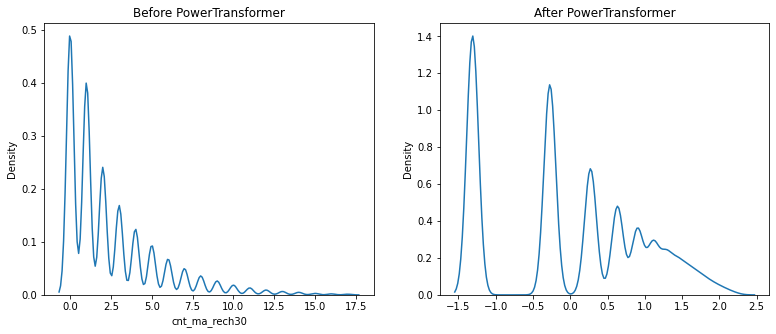

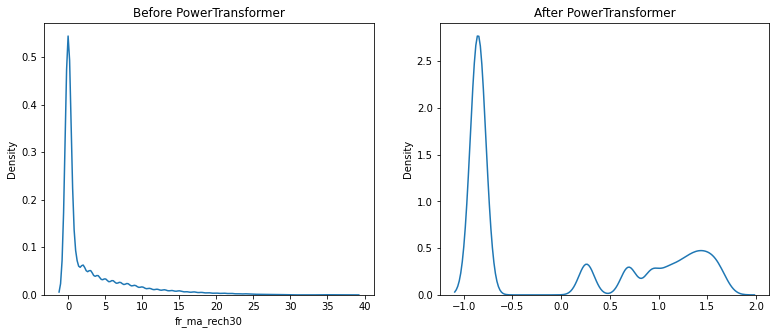

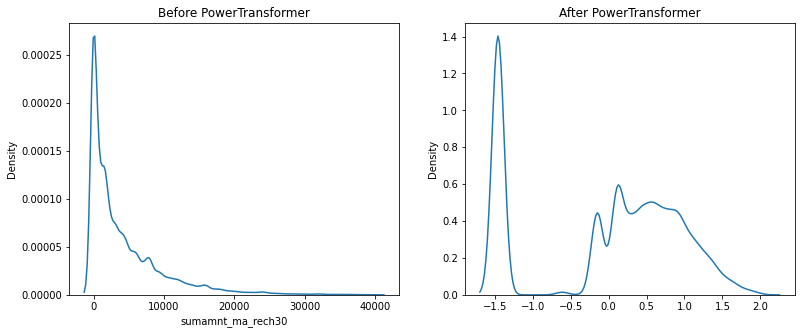

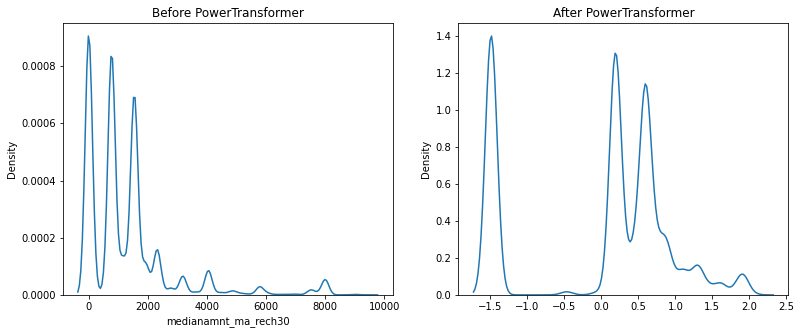

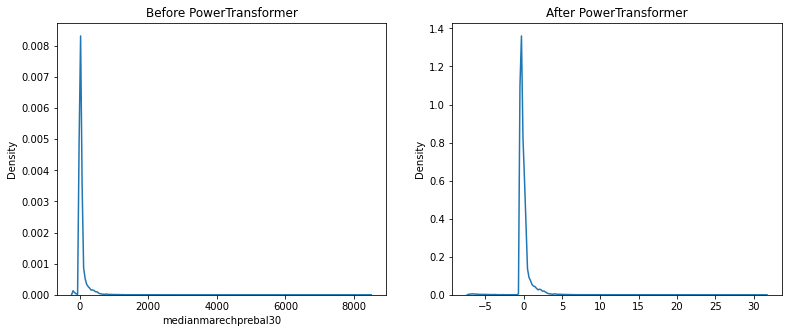

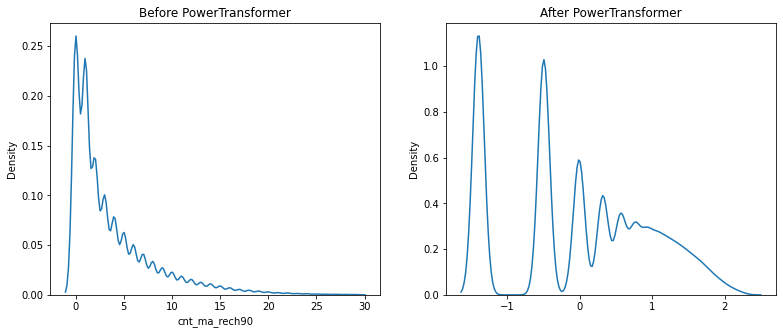

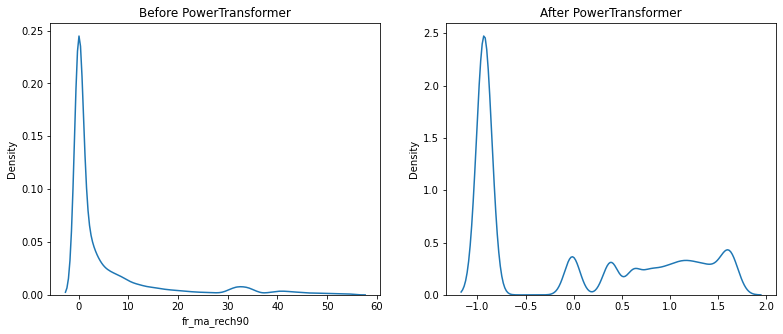

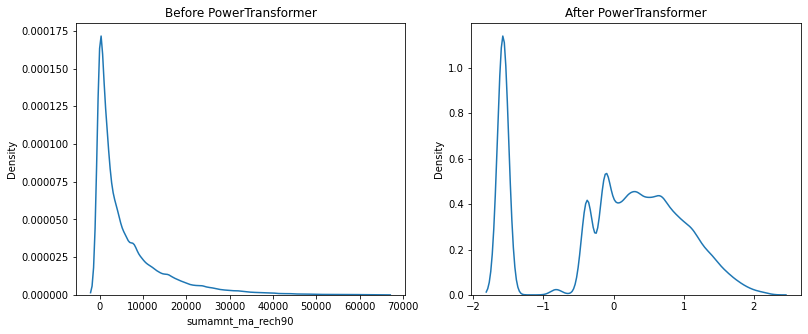

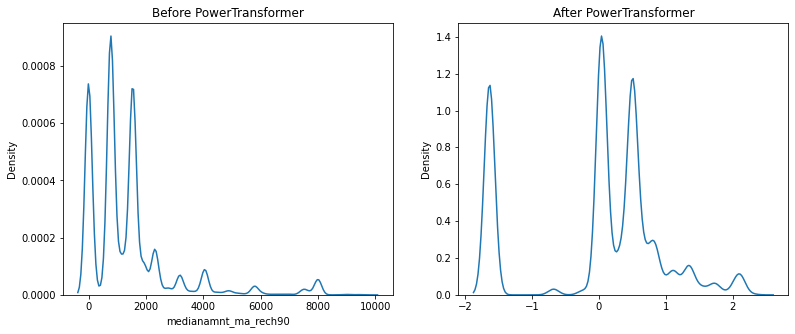

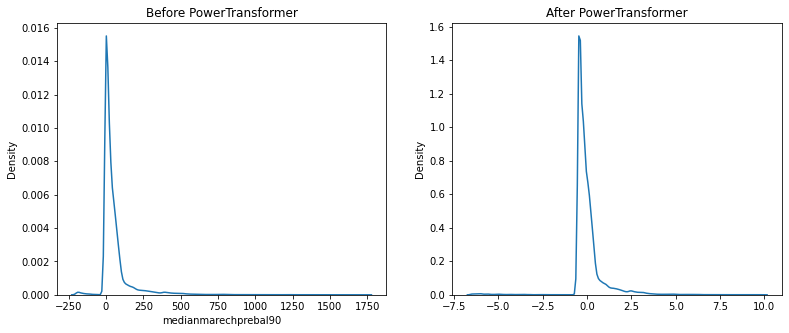

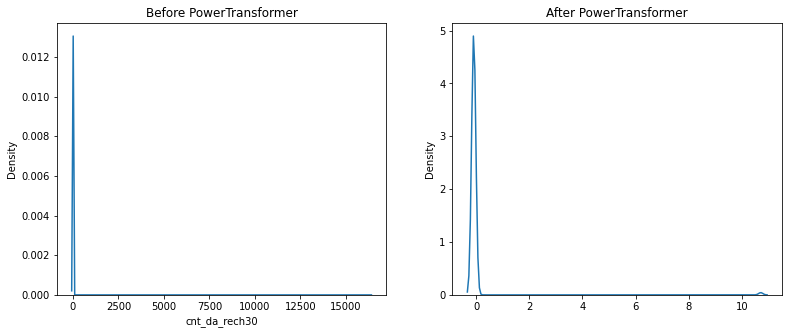

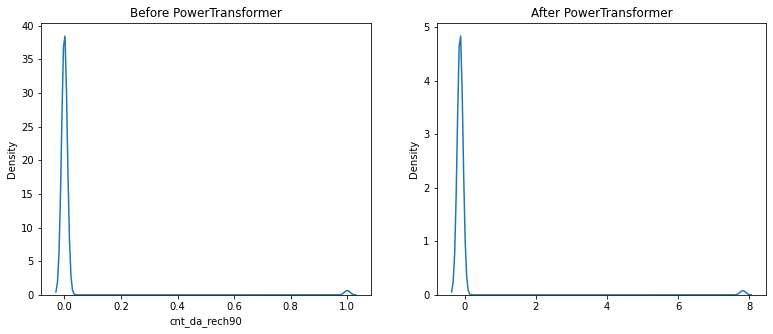

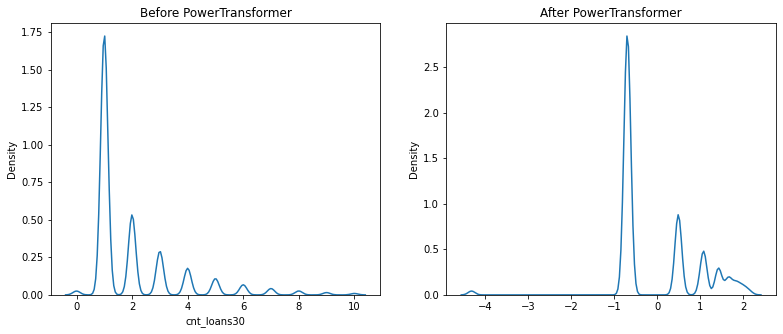

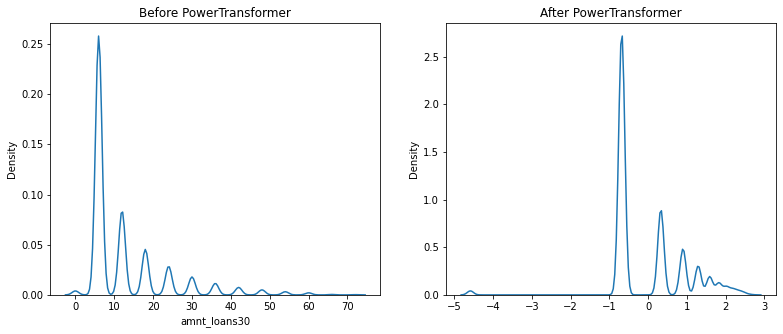

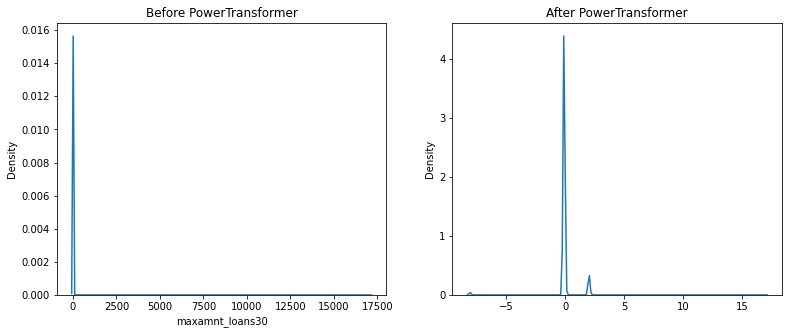

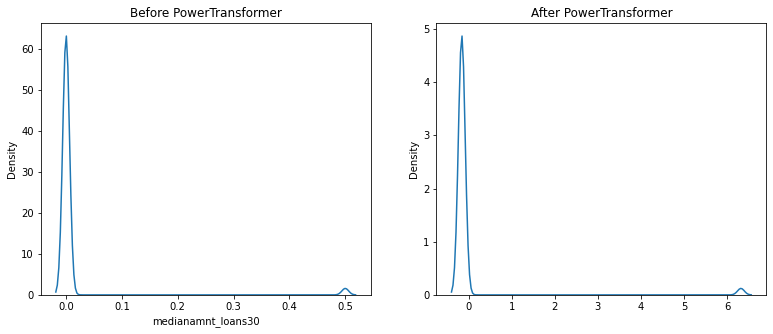

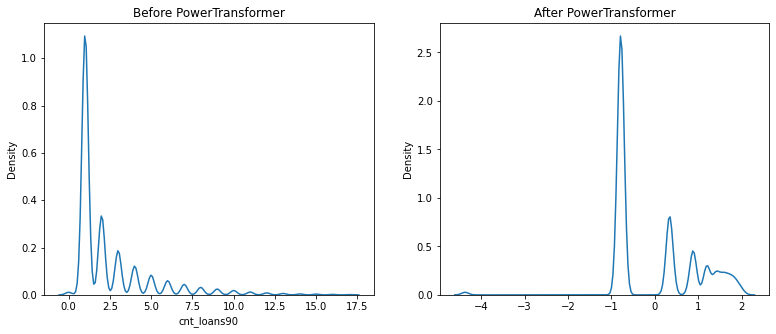

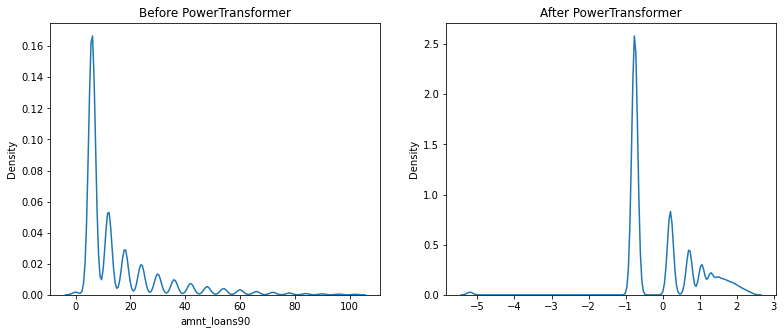

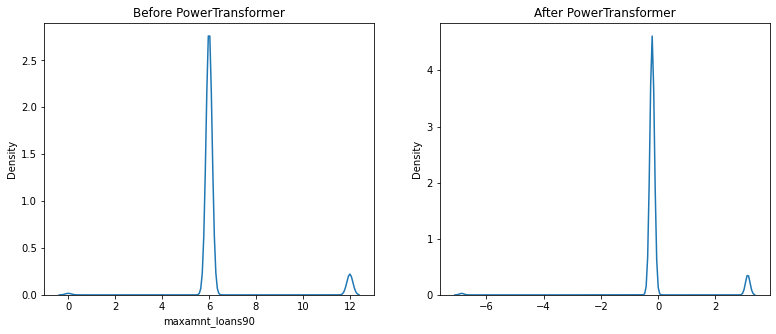

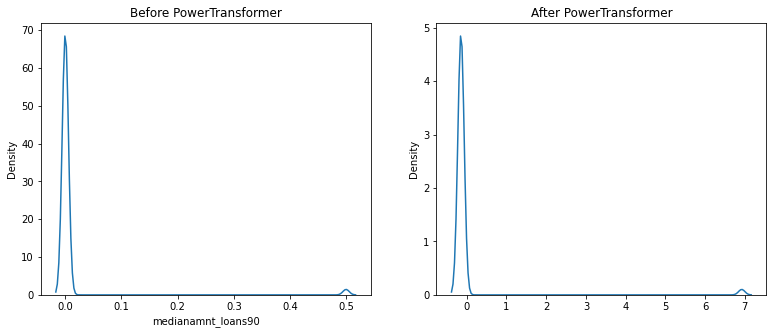

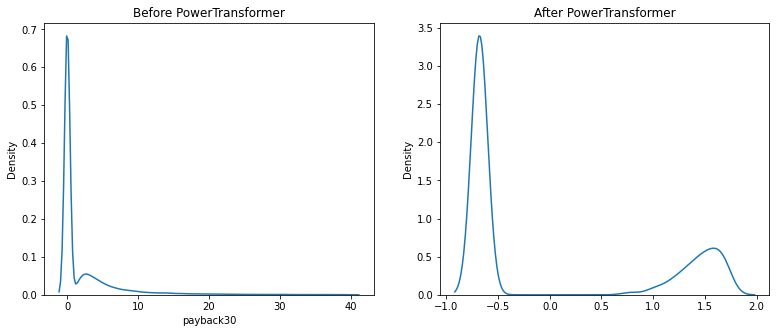

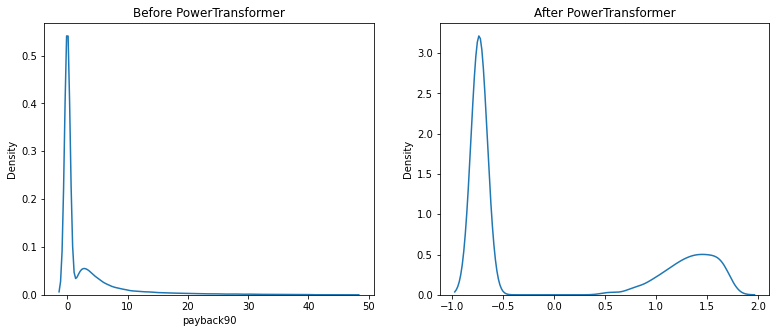

In [ ]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90', 
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

for col in columns:
    plots(data_df, col, PowerTransformer('yeo-johnson'))

In [41]:
p=PowerTransformer('yeo-johnson')
p.fit_transform(data_df)

array([[ 1.04864243,  0.36547194,  1.4911547 , ..., -0.73511882,
        -0.42467057,  1.72366699],
       [ 1.04864243,  0.01014193,  0.52444645, ..., -0.73511882,
         0.63574377,  1.72366699],
       [ 1.04864243, -0.68409674, -0.6895228 , ..., -0.73511882,
        -0.99367092, -1.01971093],
       ...,
       [-0.9536139 , -0.45171134,  0.41308487, ..., -0.73511882,
        -0.8425449 ,  0.73393069],
       [-0.9536139 , -0.67594219, -0.78692187, ..., -0.73511882,
         1.72010995, -1.01971093],
       [-0.9536139 , -1.11528984,  1.15613198, ..., -0.73511882,
         0.9487265 ,  0.73393069]])

In [ ]:
#checking the skewness after the transformation
data_df.skew()

label                    0.095029
aon                      1.049596
daily_decr30             2.674571
daily_decr90             2.812244
rental30                 2.458353
rental90                 2.511259
last_rech_date_ma        2.948628
last_rech_date_da       11.607682
last_rech_amt_ma         2.323436
cnt_ma_rech30            1.687137
fr_ma_rech30             2.317207
sumamnt_ma_rech30        2.144876
medianamnt_ma_rech30     2.407876
medianmarechprebal30    10.877866
cnt_ma_rech90            1.896385
fr_ma_rech90             2.336547
sumamnt_ma_rech90        2.262699
medianamnt_ma_rech90     2.382048
medianmarechprebal90     5.308149
cnt_da_rech30           46.268002
fr_da_rech30             0.000000
cnt_da_rech90            7.697507
fr_da_rech90             0.000000
cnt_loans30              2.057752
amnt_loans30             2.057728
maxamnt_loans30         45.326848
medianamnt_loans30       6.164720
cnt_loans90              2.347348
amnt_loans90             2.334810
maxamnt_loans9

In [42]:
#Now separating input and output variable
#Predicting
x=data_df.drop(['label'],axis=1)
y=data_df['label']
print(x.shape)
print(y.shape)

(309182, 34)
(309182,)


In [43]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.23104995,  1.94672455,  1.68972229, ..., -0.47462975,
        -0.52299253,  2.12531918],
       [-0.13091499, -0.25984725, -0.27305126, ..., -0.47462975,
         0.58464202,  2.12531918],
       [-0.73214489, -0.54313205, -0.52497208, ..., -0.47462975,
        -1.01527455, -0.95898232],
       ...,
       [-0.54809492, -0.33350938, -0.33855786, ..., -0.47462975,
        -0.89220404,  0.58316843],
       [-0.72600989, -0.54482505, -0.52647763, ..., -0.47462975,
         1.93841758, -0.95898232],
       [-1.01844484,  0.71843141,  0.60117458, ..., -0.47462975,
         0.95385354,  0.58316843]])

In [44]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))

In [46]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,50):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.7678897747303395
random state:  43  accuracy score:  0.7713181428594531
random state:  44  accuracy score:  0.770816824878309
random state:  45  accuracy score:  0.7715930591716933
random state:  46  accuracy score:  0.7704448792793959
random state:  47  accuracy score:  0.7694584148648868
random state:  48  accuracy score:  0.7699920759415884
random state:  49  accuracy score:  0.7712372851205589

max accuracy score at random state: 45  for the model  LR  is:  0.7715930591716933


DT
random state:  42  accuracy score:  0.9616087455730388
random state:  43  accuracy score:  0.9608163397318757
random state:  44  accuracy score:  0.9628054401086727
random state:  45  accuracy score:  0.9598622184129243
random state:  46  accuracy score:  0.9626113815353268
random state:  47  accuracy score:  0.961285314617462
random state:  48  accuracy score:  0.962077720458625
random state:  49  accuracy score:  0.9632259003509226

max accuracy score at random s

In [47]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.7695324344539005
Cross Validation Score(Std):  0.0022971918123829943

Model name:  DT
Cross Validation Score(Mean):  0.9544765408639755
Cross Validation Score(Std):  0.0011103730647490768

Model name:  GNB
Cross Validation Score(Mean):  0.7248458630657584
Cross Validation Score(Std):  0.0018812732958196803

Model name:  ETC
Cross Validation Score(Mean):  0.9802906870969699
Cross Validation Score(Std):  0.0004566907354971781

Model name:  RFC
Cross Validation Score(Mean):  0.9736845297054721
Cross Validation Score(Std):  0.00041925850405491965

Model name:  ABC
Cross Validation Score(Mean):  0.8185894196365402
Cross Validation Score(Std):  0.0020207967512375098

Model name:  GBC
Cross Validation Score(Mean):  0.8507024601265438
Cross Validation Score(Std):  0.0011558555283190098

Model name:  XGB
Cross Validation Score(Mean):  0.8485152317613049
Cross Validation Score(Std):  0.0018502959304751675



In [48]:
#checking for the best results
result=pd.DataFrame({'Model': models ,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",77.159306,76.953243
1,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",96.322590,95.447654
2,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",72.647444,72.484586
3,"(ETC, (ExtraTreeClassifier(ccp_alpha=0.0, clas...",98.584990,98.029069
4,"(RFC, (DecisionTreeClassifier(ccp_alpha=0.0, c...",98.023837,97.368453
5,"(ABC, (DecisionTreeClassifier(ccp_alpha=0.0, c...",82.166017,81.858942
6,"(GBC, ([DecisionTreeRegressor(ccp_alpha=0.0, c...",85.206268,85.070246
7,"(XGB, XGBClassifier(base_score=0.5, booster='g...",84.868283,84.851523


In [49]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.20)
model_name=ExtraTreesClassifier()
model_name.fit(x_train,y_train)
training_scr=model_name.score(x_train,y_train)
y_pred=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred)
cfm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("training score: ",training_scr)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)

training score:  0.9999838282560796
accuracy score:  0.9859954396235263
confusion matrix: 
[[32142    57]
 [  809 28829]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32199
           1       1.00      0.97      0.99     29638

    accuracy                           0.99     61837
   macro avg       0.99      0.99      0.99     61837
weighted avg       0.99      0.99      0.99     61837



In [50]:
#Hyper-Tuning the Best Model

#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

In [51]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [52]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
ET_RSCV = RandomizedSearchCV(estimator = ExtraTreesClassifier(), param_distributions = random_grid,scoring='accuracy',
                               n_iter = 5, cv = 5, verbose=2, random_state=47, n_jobs = 1)

ET_RSCV.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10, total= 1.8min
[CV] n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10, total= 1.8min
[CV] n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10 
[CV]  n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10, total= 1.8min
[CV] n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10 
[CV]  n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10, total= 1.8min
[CV] n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10 
[CV]  n_estimators=733, min_samples_split=15, max_features=auto, max_depth=10, total= 1.8min
[CV] n_estimators=100, min_samples_split=100, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, max_features=auto, max_depth=5, total=  10.1s
[CV] n_estimators=100, min_samples_split=100, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, max_features=auto, max_depth=5, total=   9.9s
[CV] n_estimators=100, min_samples_split=100, max_fe

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 48.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [63]:
ET_RSCV.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 1155}

In [72]:
y_pred=ET_RSCV.predict(x_test)

In [77]:
ET_RSCV.score(x_train, y_train)

0.9581151832460733

In [75]:
ET_RSCV.score(x_test, y_test)

0.9446771350485955

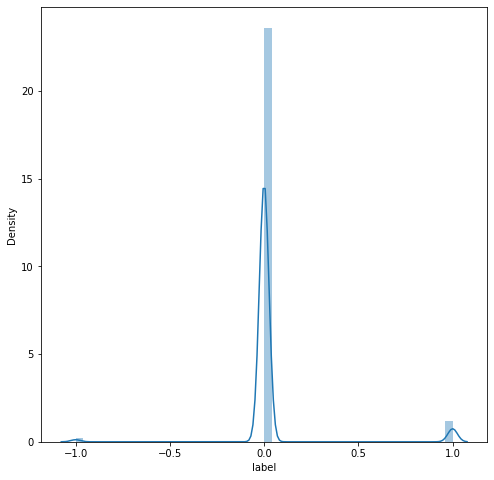

In [78]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred)
plt.show()

In [74]:
  print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))
  print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

roc_auc_score:  0.9429162338924262
MAE: 0.055322864951404496
MSE: 0.055322864951404496
RMSE: 0.23520813113369293


In [81]:
#saving the model as pickle in a file
pickle.dump(ET_RSCV.best_estimator_, open('Microcredit.pkl','wb'))

In [83]:
#loading the model for testing
loaded_model=pickle.load(open('Microcredit.pkl','rb'))
pred=loaded_model.predict(x_test)